# Cryptocurrency Liquidity Prediction for Market Stability

## given problem statment
-  Cryptocurrency markets are highly volatile, and liquidity plays a crucial role in market stability. Liquidity refers to
the ease with which assets can be bought or sold without significantly impacting the price. A lack of liquidity
can lead to increased price fluctuations and market instability.
 - In this project, you are required to build a machine learning model to predict cryptocurrency liquidity levels
based on various market factors such as trading volume, transaction patterns, exchange listings, and social
media activity. The objective is to detect liquidity crises early to help traders and exchange platforms
manage risks effectively.
 - Your final model should provide insights into market stability by forecasting liquidity variations, allowing
traders and financial institutions to make informed decisions

##  Dataset link
dataset link : https://drive.google.com/drive/folders/10BRgPip2Zj_56is3DilJCowjfyT6E9AM

## project workflow
- Step 1: Data Collection
- Step 2: Data Preprocessing
- Step 3: Exploratory Data Analysis (EDA)
- Step 4: Feature Engineering
- Step 5: Modeling
- Step 6: Evaluation
- Step 7: Deployment (in local system (i am using render))
- Step 8: Documentation


### step 1 Data collection
- Dataset is provided via Google Drive for historical price and trading volume

In [ ]:
#required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load dataset
df_16 = pd.read_csv("coin_gecko_2022-03-16.csv")
df_17 = pd.read_csv("coin_gecko_2022-03-17.csv")

In [ ]:
df_16.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [ ]:
df_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        500 non-null    object 
 1   symbol      500 non-null    object 
 2   price       500 non-null    float64
 3   1h          497 non-null    float64
 4   24h         497 non-null    float64
 5   7d          497 non-null    float64
 6   24h_volume  497 non-null    float64
 7   mkt_cap     500 non-null    float64
 8   date        500 non-null    object 
dtypes: float64(6), object(3)
memory usage: 35.3+ KB


In [ ]:
df_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        500 non-null    object 
 1   symbol      500 non-null    object 
 2   price       500 non-null    float64
 3   1h          496 non-null    float64
 4   24h         496 non-null    float64
 5   7d          495 non-null    float64
 6   24h_volume  496 non-null    float64
 7   mkt_cap     500 non-null    float64
 8   date        500 non-null    object 
dtypes: float64(6), object(3)
memory usage: 35.3+ KB


In [ ]:
df_16['date'].unique()

array(['2022-03-16'], dtype=object)

In [ ]:
df_17['date'].unique()

array(['2022-03-17'], dtype=object)

In [ ]:
#describe both dataset
df_16.describe()

,price,1h,24h,7d,24h_volume,mkt_cap
count,5.000000e+02,497.000000,497.000000,497.000000,4.970000e+02,5.000000e+02
mean,6.527851e+02,0.018746,0.028849,0.039016,3.276644e+08,3.722677e+09
std,4.578529e+03,0.013867,0.058065,0.203688,3.182264e+09,3.784349e+10
min,1.544000e-09,-0.039000,-0.141000,-0.547000,0.000000e+00,6.577043e+07
25%,1.904625e-01,0.011000,0.004000,-0.020000,1.838591e+06,1.146391e+08
50%,1.085000e+00,0.018000,0.021000,0.006000,8.581305e+06,2.083208e+08
75%,6.925000e+00,0.026000,0.040000,0.049000,4.075655e+07,5.845642e+08
max,4.121727e+04,0.086000,0.573000,2.935000,5.793497e+10,7.709915e+11


In [ ]:
df_17.describe()

,price,1h,24h,7d,24h_volume,mkt_cap
count,5.000000e+02,496.000000,496.000000,495.000000,4.960000e+02,5.000000e+02
mean,6.594269e+02,0.000681,0.018615,0.008038,2.508801e+08,3.787932e+09
std,4.595355e+03,0.033128,0.060142,0.252549,2.285948e+09,3.826905e+10
min,1.484000e-09,-0.704000,-0.646000,-0.558000,4.349000e+01,6.731896e+07
25%,2.043850e-01,-0.001000,0.000000,-0.051500,1.757171e+06,1.194822e+08
50%,1.100000e+00,0.001000,0.011000,-0.014000,7.890414e+06,2.168525e+08
75%,7.435000e+00,0.004000,0.030000,0.020000,3.638643e+07,6.091268e+08
max,4.090907e+04,0.095000,0.577000,4.608000,4.413140e+10,7.760774e+11


- we see all coumn has outlier

## Step 2: Data Preprocessing

In [ ]:
# numeric column and categorical column
numeric_col_16 = df_16.select_dtypes(include=np.number).columns
categorical_col_16 = df_16.select_dtypes(exclude=np.number).columns

In [ ]:
#missing value fill nan with mediumn
df_16[numeric_col_16] = df_16[numeric_col_16].fillna(df_16[numeric_col_16].median())

In [ ]:
#nan value for df_16
df_16.isna().sum()

,0
coin,0
symbol,0
price,0
1h,0
24h,0
7d,0
24h_volume,0
mkt_cap,0
date,0


In [ ]:
#df 17 nan value
df_17.isna().sum()

,0
coin,0
symbol,0
price,0
1h,4
24h,4
7d,5
24h_volume,4
mkt_cap,0
date,0


In [ ]:
#numeric and categoric column
numeric_col_17 = df_17.select_dtypes(include=np.number).columns
categorical_col_17 = df_17.select_dtypes(exclude=np.number).columns

In [ ]:
#fill nan value with mediumn
df_17[numeric_col_17] = df_17[numeric_col_17].fillna(df_17[numeric_col_17].median())

In [ ]:
#check nan value
df_17.isna().sum()

,0
coin,0
symbol,0
price,0
1h,0
24h,0
7d,0
24h_volume,0
mkt_cap,0
date,0


In [ ]:
#convert date column to date time column
df_16['date'] = pd.to_datetime(df_16['date'])
df_17['date'] = pd.to_datetime(df_17['date'])

In [ ]:
df_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   coin        500 non-null    object        
 1   symbol      500 non-null    object        
 2   price       500 non-null    float64       
 3   1h          500 non-null    float64       
 4   24h         500 non-null    float64       
 5   7d          500 non-null    float64       
 6   24h_volume  500 non-null    float64       
 7   mkt_cap     500 non-null    float64       
 8   date        500 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 35.3+ KB


In [ ]:
df_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   coin        500 non-null    object        
 1   symbol      500 non-null    object        
 2   price       500 non-null    float64       
 3   1h          500 non-null    float64       
 4   24h         500 non-null    float64       
 5   7d          500 non-null    float64       
 6   24h_volume  500 non-null    float64       
 7   mkt_cap     500 non-null    float64       
 8   date        500 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 35.3+ KB


In [ ]:
df_16.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [ ]:
df_17.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40851.380000,0.001,0.000,-0.027,2.047612e+10,7.760774e+11,2022-03-17
1,Ethereum,ETH,2824.420000,0.004,0.029,0.034,1.364041e+10,3.390772e+11,2022-03-17
2,Tether,USDT,1.000000,-0.000,0.000,0.000,4.413140e+10,8.020588e+10,2022-03-17
3,BNB,BNB,389.610000,0.002,0.016,-0.010,1.425354e+09,6.556116e+10,2022-03-17
4,USD Coin,USDC,0.999739,-0.001,0.000,-0.000,3.569816e+09,5.259607e+10,2022-03-17


In [ ]:
# combine data save as df
df = pd.concat([df_16,df_17])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   coin        1000 non-null   object        
 1   symbol      1000 non-null   object        
 2   price       1000 non-null   float64       
 3   1h          1000 non-null   float64       
 4   24h         1000 non-null   float64       
 5   7d          1000 non-null   float64       
 6   24h_volume  1000 non-null   float64       
 7   mkt_cap     1000 non-null   float64       
 8   date        1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 78.1+ KB


In [ ]:
df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [ ]:
df.tail()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
495,IRISnet,IRIS,0.055426,0.016,-0.003,-0.088,2976839.00,68090240.0,2022-03-17
496,Circuits of Value,COVAL,0.037961,0.002,-0.012,-0.054,366787.00,67826274.0,2022-03-17
497,ARPA Chain,ARPA,0.069003,-0.000,0.008,-0.037,13633759.00,67762845.0,2022-03-17
498,SuperRare,RARE,0.464613,-0.003,0.014,0.019,9398219.00,67388220.0,2022-03-17
499,Verus Coin,VRSC,0.999387,0.053,0.061,-0.122,20275.07,67318962.0,2022-03-17


In [ ]:
df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap,date
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000
mean,6.561060e+02,0.009713,0.023678,0.023318,2.873430e+08,3.755304e+09,2022-03-16 12:00:00
min,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07,2022-03-16 00:00:00
25%,1.940547e-01,0.001000,0.001000,-0.040250,1.842994e+06,1.157776e+08,2022-03-16 00:00:00
50%,1.095000e+00,0.006000,0.016000,-0.001000,8.328741e+06,2.120036e+08,2022-03-16 12:00:00
75%,7.232500e+00,0.019000,0.035000,0.036000,3.923430e+07,5.948436e+08,2022-03-17 00:00:00
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760774e+11,2022-03-17 00:00:00
std,4.584655e+03,0.026849,0.059101,0.228877,2.760286e+09,3.803783e+10,NaN


### add liquidation ration feature

## STEP 3: Exploratory Data Analysis (EDA)

In [ ]:
df['liquidity_ratio'] = df['24h_volume'] / df['mkt_cap']

In [ ]:
df['volatility_24h'] = abs(df['24h'])  # simple volatility proxy

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 499
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   coin             1000 non-null   object        
 1   symbol           1000 non-null   object        
 2   price            1000 non-null   float64       
 3   1h               1000 non-null   float64       
 4   24h              1000 non-null   float64       
 5   7d               1000 non-null   float64       
 6   24h_volume       1000 non-null   float64       
 7   mkt_cap          1000 non-null   float64       
 8   date             1000 non-null   datetime64[ns]
 9   liquidity_ratio  1000 non-null   float64       
 10  volatility_24h   1000 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 93.8+ KB


In [ ]:
# Top Coins by Market Cap & Volume
top_market_cap = df.sort_values(by='mkt_cap', ascending=False).head(10)
top_volume = df.sort_values(by='24h_volume', ascending=False).head(10)

In [ ]:
top_market_cap[['coin', 'mkt_cap']], top_volume[['coin', '24h_volume']]

(       coin       mkt_cap
 0   Bitcoin  7.760774e+11
 0   Bitcoin  7.709915e+11
 1  Ethereum  3.390772e+11
 1  Ethereum  3.271044e+11
 2    Tether  8.020588e+10
 2    Tether  7.996516e+10
 3       BNB  6.556116e+10
 3       BNB  6.404382e+10
 4  USD Coin  5.259607e+10
 4  USD Coin  5.222214e+10,
            coin    24h_volume
 2        Tether  5.793497e+10
 2        Tether  4.413140e+10
 0       Bitcoin  3.539076e+10
 0       Bitcoin  2.047612e+10
 1      Ethereum  1.974870e+10
 1      Ethereum  1.364041e+10
 11  Binance USD  4.039490e+09
 5           XRP  3.925205e+09
 4      USD Coin  3.872274e+09
 11  Binance USD  3.713595e+09)

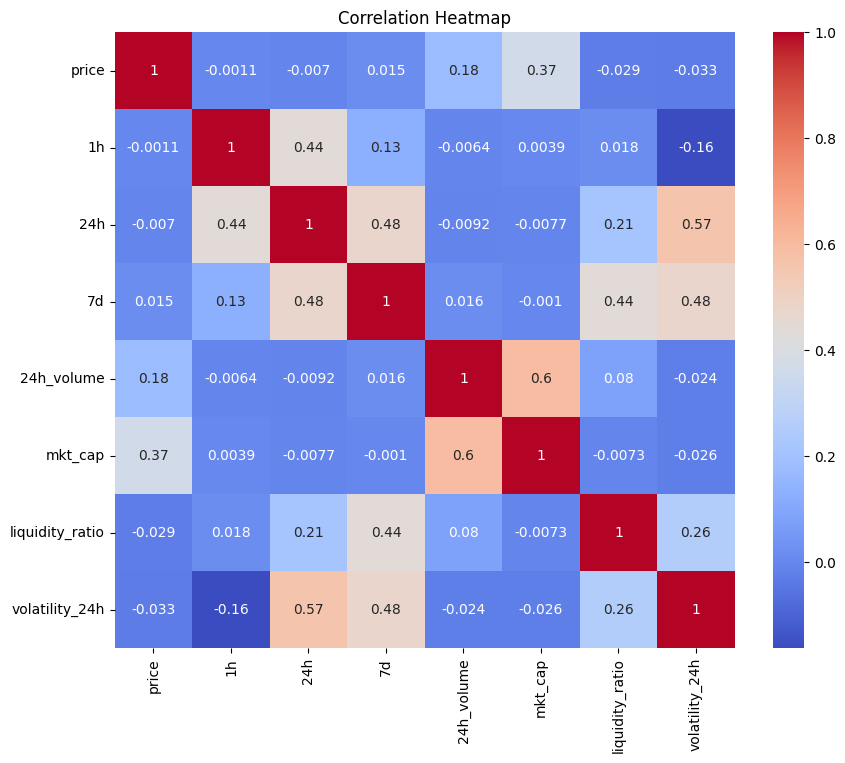

In [ ]:
#corretion heatmap numeric feture
numeric_col = df.select_dtypes(include=np.number).columns
# corre heat map
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_col].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- we see there are no high correlation between feature so we can apply any algorithms
- we also confirm with vif thats show in below code

In [ ]:
#confirm with vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df):
    vif = pd.DataFrame()
    vif['variables'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif
#use case
calculate_vif(df[numeric_col])

,variables,VIF
0,price,1.170643
1,1h,1.634645
2,24h,2.921875
3,7d,1.530779
4,24h_volume,1.601385
5,mkt_cap,1.778435
6,liquidity_ratio,1.319078
7,volatility_24h,2.206380


In [ ]:
# set plot style
sns.set_style("whitegrid")

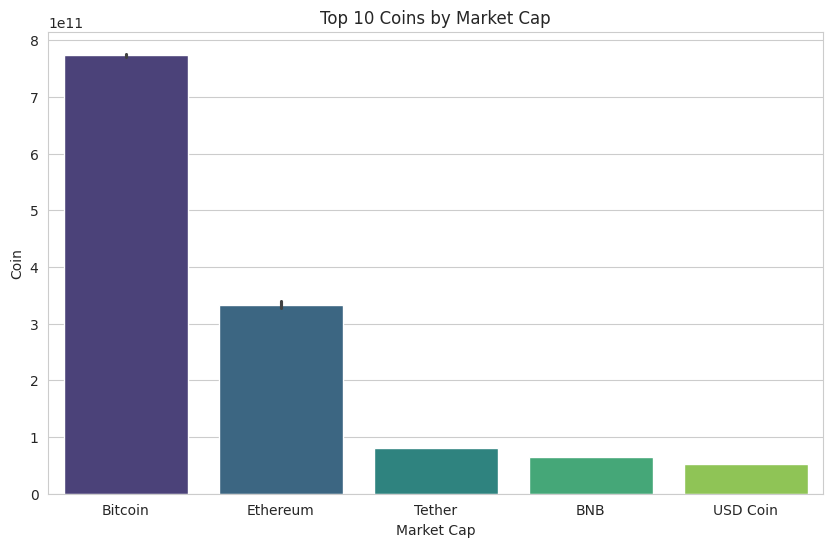

In [ ]:
# Top 10 by market cap bar plot
top_market_cap = df.sort_values(by='mkt_cap', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='coin', y='mkt_cap', data=top_market_cap, palette='viridis')
plt.title('Top 10 Coins by Market Cap')
plt.xlabel('Market Cap')
plt.ylabel('Coin')
plt.show()

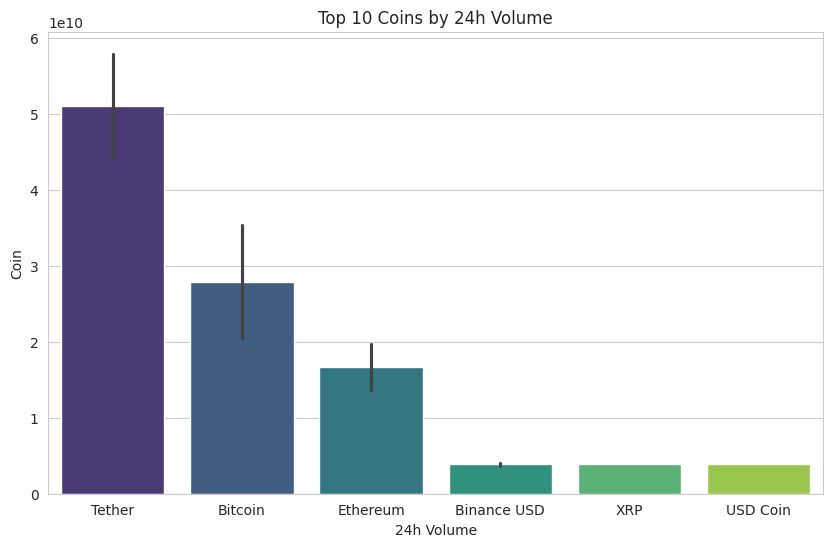

In [ ]:
# Top 10 by volume bar plot
top_volume = df.sort_values(by='24h_volume', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='coin', y='24h_volume', data=top_volume, palette='viridis')
plt.title('Top 10 Coins by 24h Volume')
plt.xlabel('24h Volume')
plt.ylabel('Coin')
plt.show()

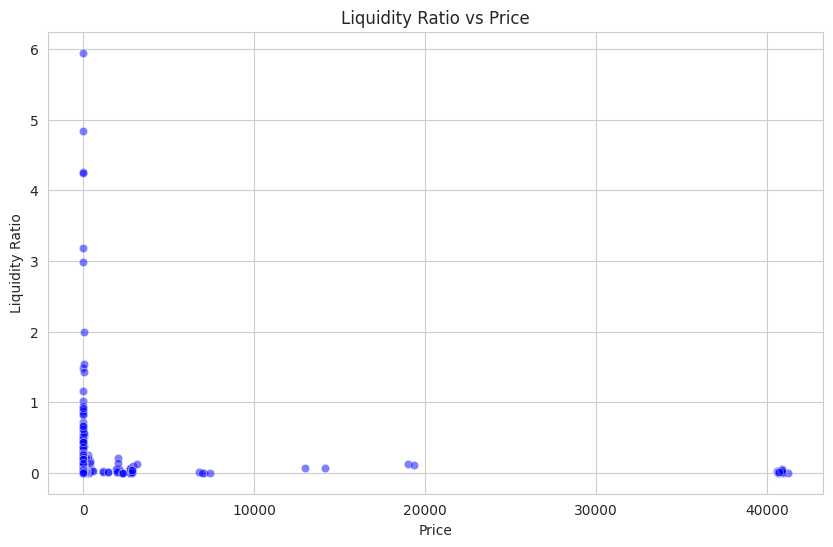

In [ ]:
# Liquidity Ratio vs Price scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='liquidity_ratio', data=df, color='blue', alpha=0.5)
plt.title('Liquidity Ratio vs Price')
plt.xlabel('Price')
plt.ylabel('Liquidity Ratio')
plt.show()

- Coins with very low or very high prices tend to have lower liquidity ratios.

- Mid-range coins show more consistency in liquidity.

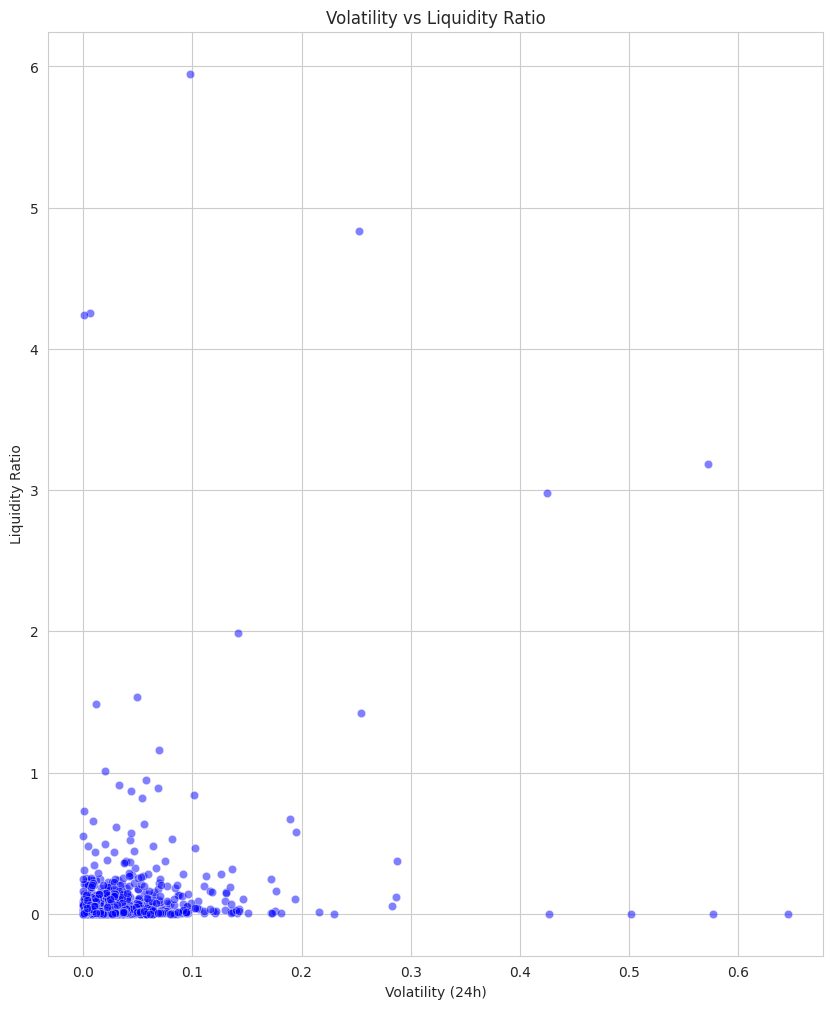

In [ ]:
# Volatility vs Liquidity Ratio scatter plot
plt.figure(figsize=(10,12))
sns.scatterplot(x='volatility_24h', y='liquidity_ratio', data=df, color='blue', alpha=0.5)
plt.title('Volatility vs Liquidity Ratio')
plt.xlabel('Volatility (24h)')
plt.ylabel('Liquidity Ratio')
plt.show()

- Volatile coins (high 24h % change) generally show lower liquidity.

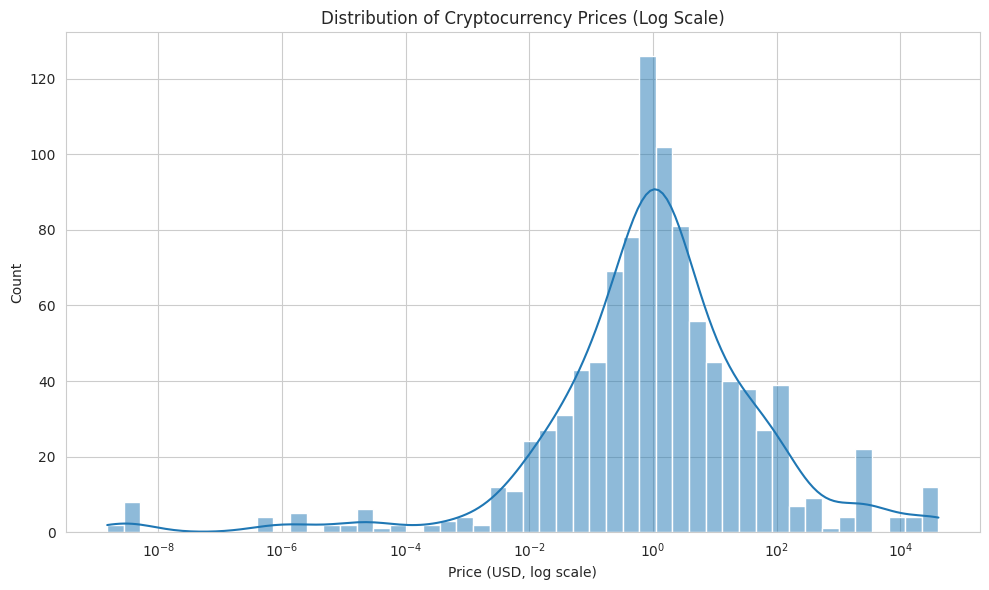

In [ ]:
# Additional EDA Charts

# Distribution of Price (log scale to handle wide range) ---
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True, log_scale=True)
plt.title("Distribution of Cryptocurrency Prices (Log Scale)")
plt.xlabel("Price (USD, log scale)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

- Crypto prices range dramatically — log scale shows:
- Most coins cluster under $100
- A few outliers like Bitcoin and Ethereum are far higher

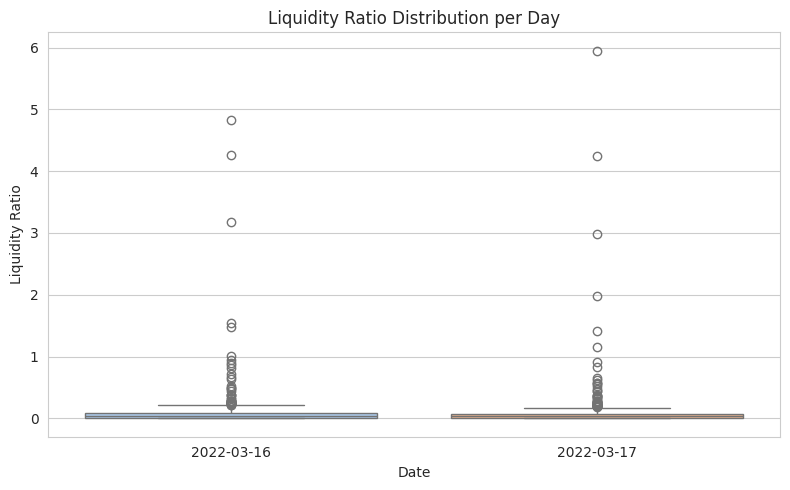

In [ ]:
# Liquidity Ratio by Date (Boxplot to show spread per day) ---
plt.figure(figsize=(8,5))
sns.boxplot(x="date", y="liquidity_ratio", data=df, palette="pastel")
plt.title("Liquidity Ratio Distribution per Day")
plt.ylabel("Liquidity Ratio")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

- Liquidity ratios vary slightly between March 16 and 17
- Indicates how trading dynamics shift daily

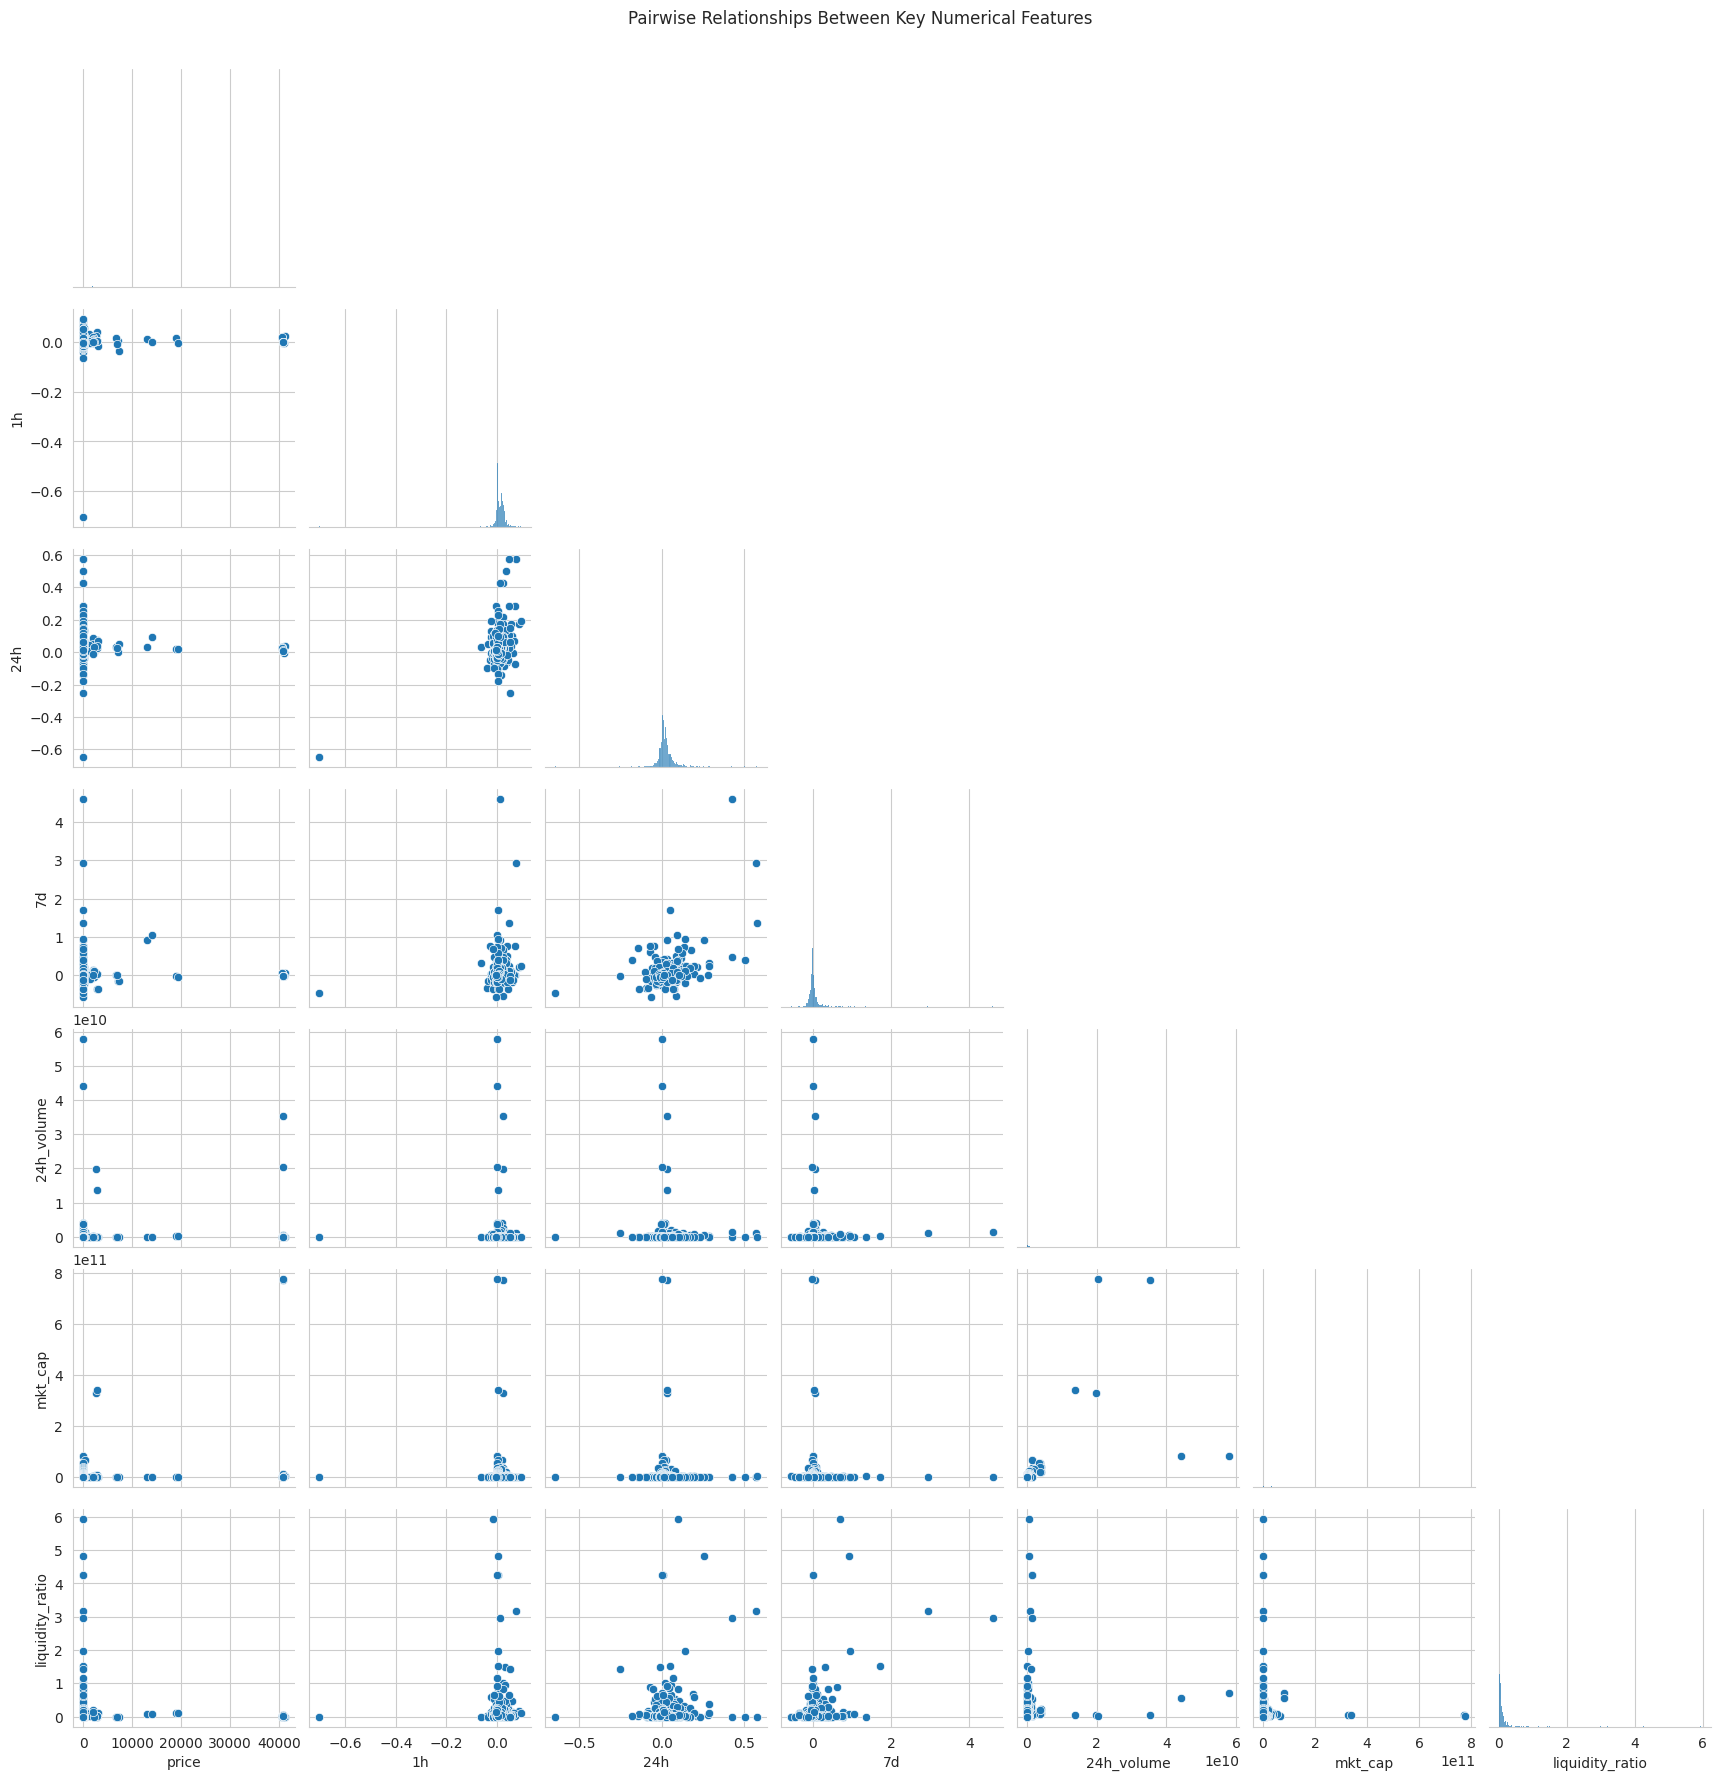

In [ ]:
# Pairplot for numerical relationships ---
selected_cols = ['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'liquidity_ratio']
sns.pairplot(df[selected_cols], corner=True)
plt.suptitle("Pairwise Relationships Between Key Numerical Features", y=1.02)
plt.show()

- 24h_volume vs mkt_cap:-	Strong positive correlation – coins with high market cap tend to have high trading volume (expected in mature assets).
- price vs mkt_cap	Positive trend – higher-priced coins generally contribute to higher market cap, although outliers exist.
- liquidity_ratio vs price	No clear pattern — liquidity is not directly price-dependent.
- volatility (24h) vs others	Scattered relationships — volatility seems coin-specific, not generally tied to liquidity or market cap.
- 24h & 7d	Most price changes cluster around 0%, with a few strong outliers
- liquidity_ratio	Highly skewed — many coins have low values, a few have very high


- we do outlier tretment before model training now we only focus on eda and feture enginerring

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 499
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   coin             1000 non-null   object        
 1   symbol           1000 non-null   object        
 2   price            1000 non-null   float64       
 3   1h               1000 non-null   float64       
 4   24h              1000 non-null   float64       
 5   7d               1000 non-null   float64       
 6   24h_volume       1000 non-null   float64       
 7   mkt_cap          1000 non-null   float64       
 8   date             1000 non-null   datetime64[ns]
 9   liquidity_ratio  1000 non-null   float64       
 10  volatility_24h   1000 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 93.8+ KB


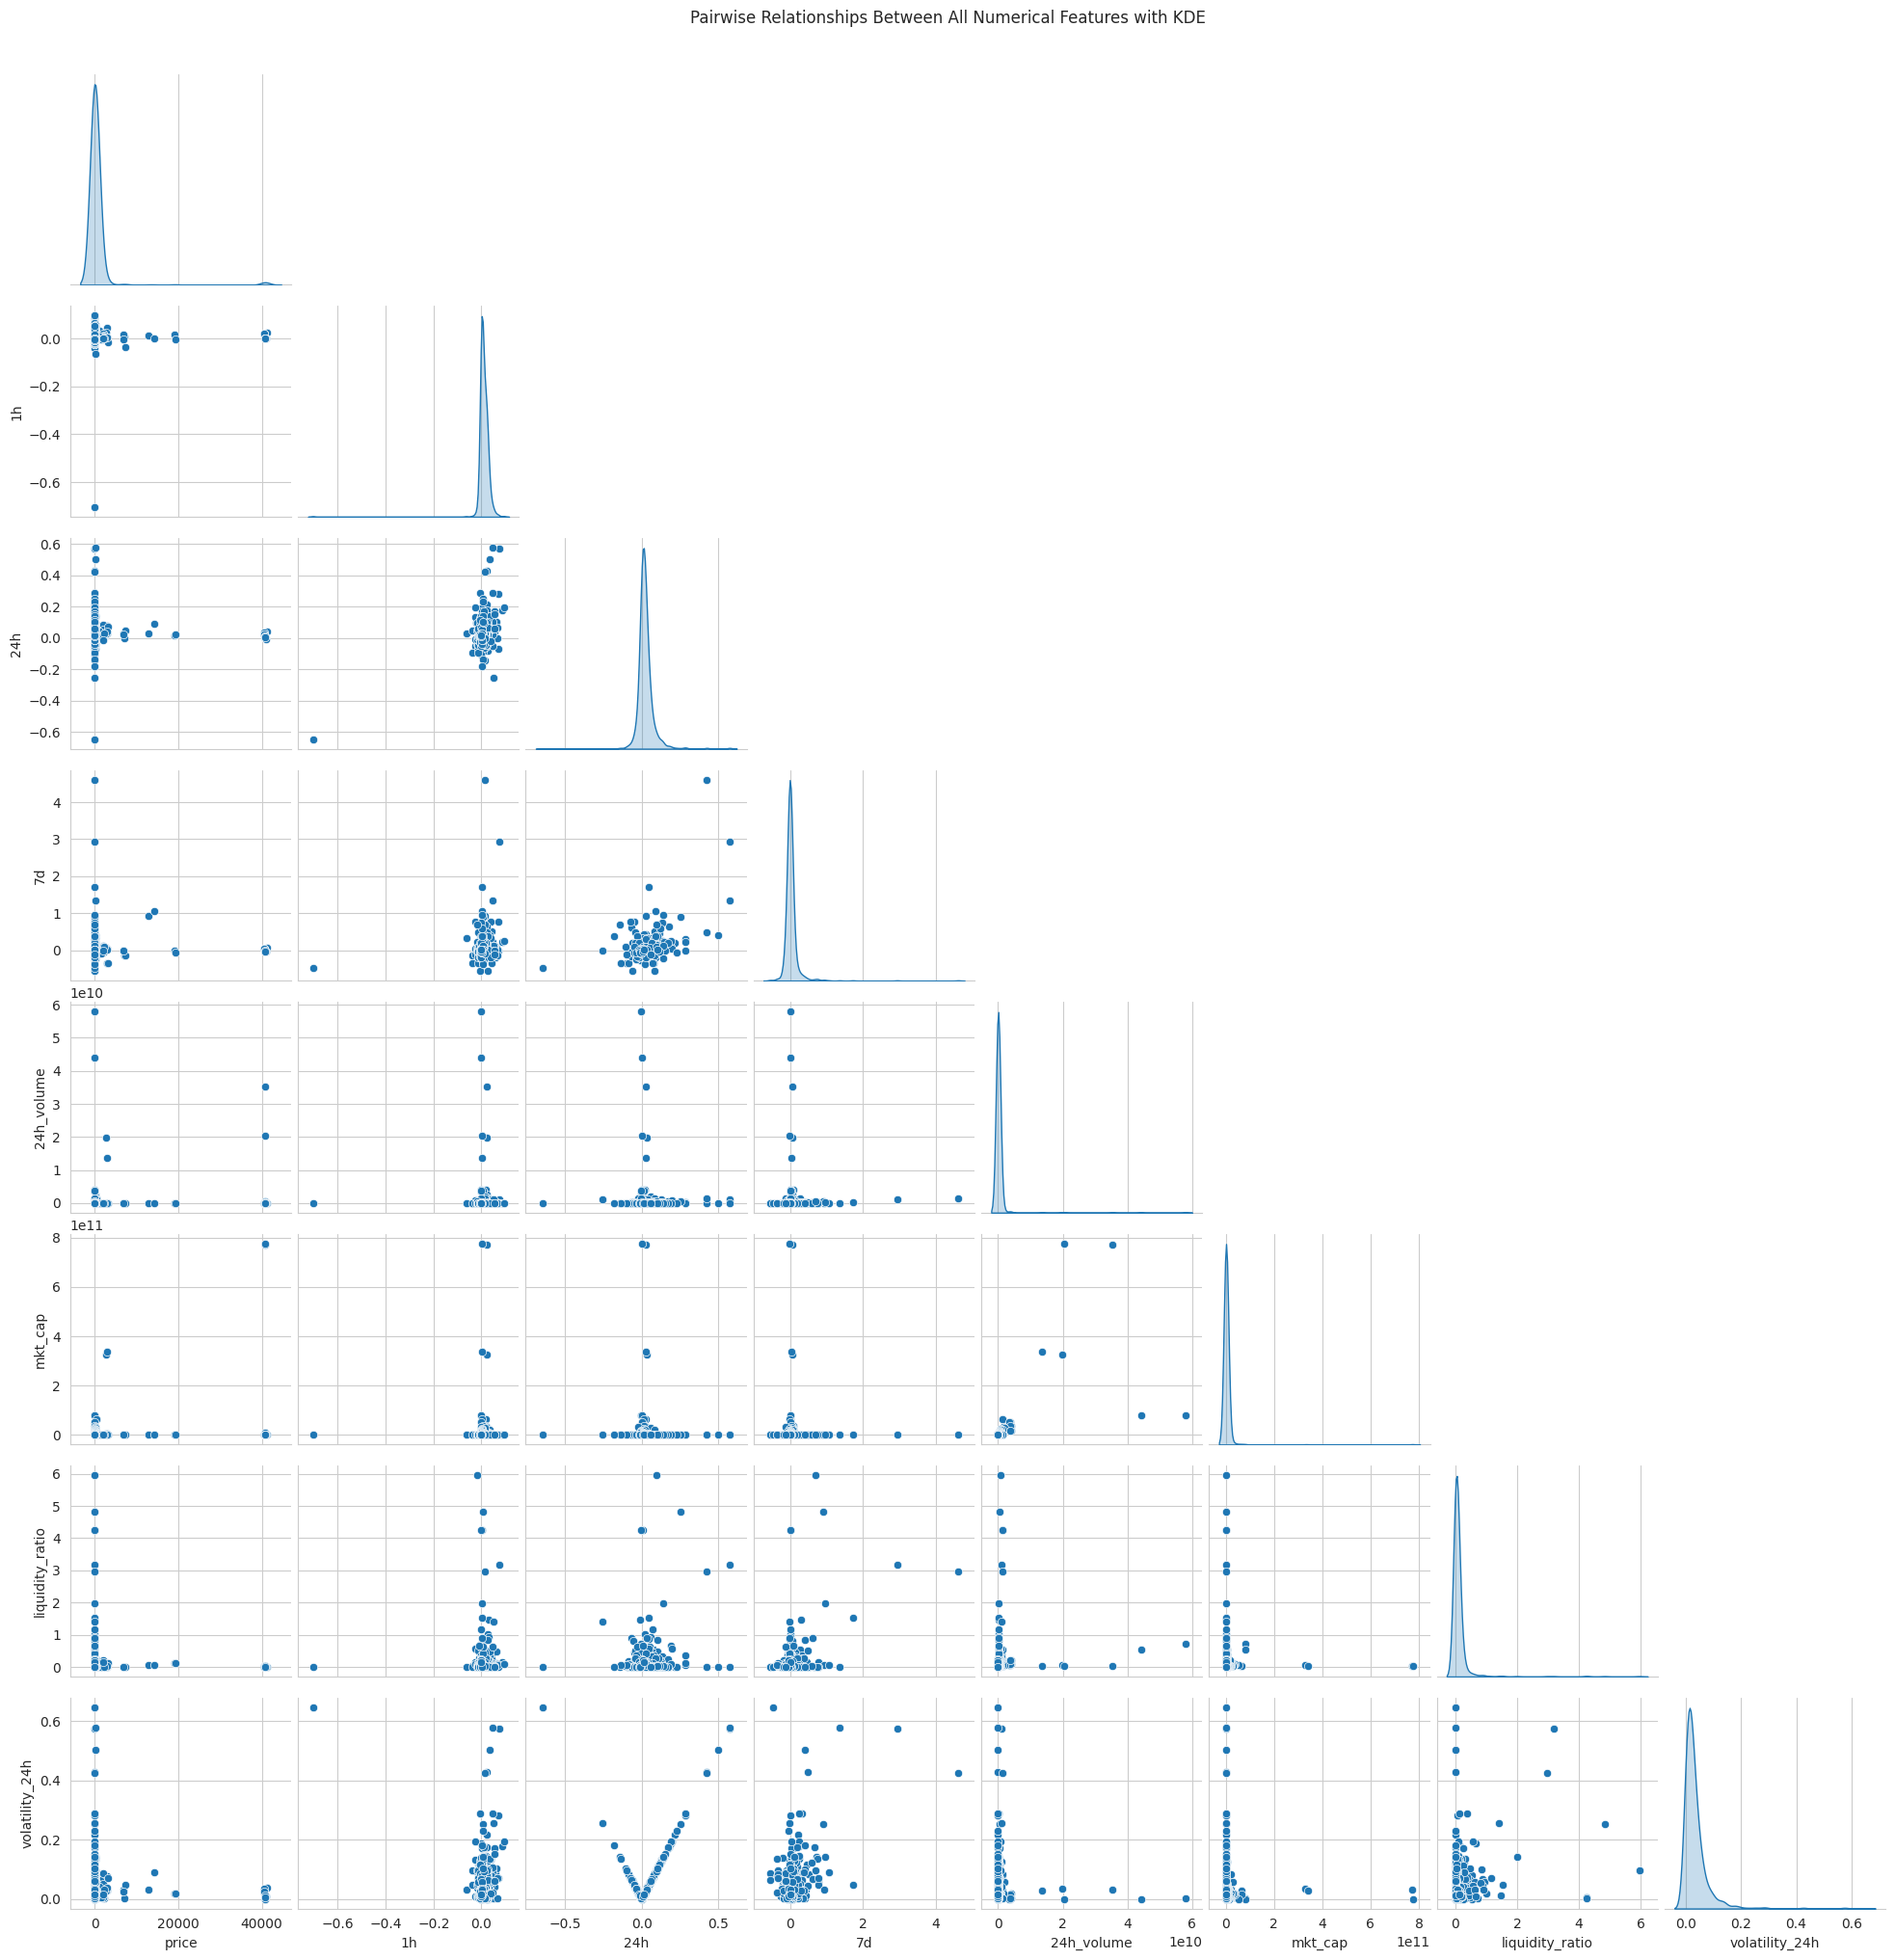

In [ ]:
# histogram of all numric column pair plot
sns.pairplot(df[numeric_col], corner=True, diag_kind='kde')
plt.suptitle("Pairwise Relationships Between All Numerical Features with KDE", y=1.02)
plt.show()

## Step 4: Feature Engineering

- in EDA we do 2 add column liquidity_ratio and volitality 24h we do others also beacuse we see above somw column was mostly right skewed and one left swed and 1 normal distibition so we do here lof transformation and scalling for model

In [ ]:
# add liquidity class new feture
median_liquidity = df['liquidity_ratio'].median()
df['liquidity_class'] = (df['liquidity_ratio'] > median_liquidity).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 499
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   coin             1000 non-null   object        
 1   symbol           1000 non-null   object        
 2   price            1000 non-null   float64       
 3   1h               1000 non-null   float64       
 4   24h              1000 non-null   float64       
 5   7d               1000 non-null   float64       
 6   24h_volume       1000 non-null   float64       
 7   mkt_cap          1000 non-null   float64       
 8   date             1000 non-null   datetime64[ns]
 9   liquidity_ratio  1000 non-null   float64       
 10  volatility_24h   1000 non-null   float64       
 11  liquidity_class  1000 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 101.6+ KB


In [ ]:
# momentum_3d create new feature
df['momentum_3d'] = df['1h'] + df['24h'] + df['7d']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   coin             1000 non-null   object        
 1   symbol           1000 non-null   object        
 2   price            1000 non-null   float64       
 3   1h               1000 non-null   float64       
 4   24h              1000 non-null   float64       
 5   7d               1000 non-null   float64       
 6   24h_volume       1000 non-null   float64       
 7   mkt_cap          1000 non-null   float64       
 8   date             1000 non-null   datetime64[ns]
 9   liquidity_ratio  1000 non-null   float64       
 10  volatility_24h   1000 non-null   float64       
 11  liquidity_class  1000 non-null   int64         
 12  momentum_3d      1000 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 109.4+ KB


In [ ]:
#add new 2 feature volum per price and price bin
df['vol_per_price'] = df['24h_volume'] / (df['price']+ 1e-6)
df['price_bin'] = pd.qcut(df['price'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 499
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   coin             1000 non-null   object        
 1   symbol           1000 non-null   object        
 2   price            1000 non-null   float64       
 3   1h               1000 non-null   float64       
 4   24h              1000 non-null   float64       
 5   7d               1000 non-null   float64       
 6   24h_volume       1000 non-null   float64       
 7   mkt_cap          1000 non-null   float64       
 8   date             1000 non-null   datetime64[ns]
 9   liquidity_ratio  1000 non-null   float64       
 10  volatility_24h   1000 non-null   float64       
 11  liquidity_class  1000 non-null   int64         
 12  momentum_3d      1000 non-null   float64       
 13  vol_per_price    1000 non-null   float64       
 14  price_bin        1000 non-null   category     

In [ ]:
#log transformation to other feature
df['log_price'] = np.log1p(df['price'])
df['log_volume'] = np.log1p(df['24h_volume'])
df['log_mkt_cap'] = np.log1p(df['mkt_cap'])
df['log_liquidity'] = np.log1p(df['liquidity_ratio'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 499
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   coin             1000 non-null   object        
 1   symbol           1000 non-null   object        
 2   price            1000 non-null   float64       
 3   1h               1000 non-null   float64       
 4   24h              1000 non-null   float64       
 5   7d               1000 non-null   float64       
 6   24h_volume       1000 non-null   float64       
 7   mkt_cap          1000 non-null   float64       
 8   date             1000 non-null   datetime64[ns]
 9   liquidity_ratio  1000 non-null   float64       
 10  volatility_24h   1000 non-null   float64       
 11  liquidity_class  1000 non-null   int64         
 12  momentum_3d      1000 non-null   float64       
 13  vol_per_price    1000 non-null   float64       
 14  price_bin        1000 non-null   category     

In [ ]:
#price_bin unique
df['price_bin'].unique()

['Very High', 'Medium', 'Low', 'High']
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']

In [ ]:
#lebel encoding low=1,medium=2,high=3,veryhigh=4
df['price_bin'] = df['price_bin'].map({'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4})

In [ ]:
df['price_bin'].unique()

[4, 2, 1, 3]
Categories (4, int64): [1 < 2 < 3 < 4]

In [ ]:
# price bi convert to int64
df['price_bin'] = df['price_bin'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 499
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   coin             1000 non-null   object        
 1   symbol           1000 non-null   object        
 2   price            1000 non-null   float64       
 3   1h               1000 non-null   float64       
 4   24h              1000 non-null   float64       
 5   7d               1000 non-null   float64       
 6   24h_volume       1000 non-null   float64       
 7   mkt_cap          1000 non-null   float64       
 8   date             1000 non-null   datetime64[ns]
 9   liquidity_ratio  1000 non-null   float64       
 10  volatility_24h   1000 non-null   float64       
 11  liquidity_class  1000 non-null   int64         
 12  momentum_3d      1000 non-null   float64       
 13  vol_per_price    1000 non-null   float64       
 14  price_bin        1000 non-null   int64        

In [ ]:
numerical_features = ['log_price', 'log_volume', 'log_mkt_cap', 'log_liquidity',
                      'volatility_24h', 'momentum_3d', 'vol_per_price']
correlations = df[numerical_features + ['liquidity_class']].corr()['liquidity_class'].sort_values(ascending=False)

In [ ]:
core_features = correlations.drop('liquidity_class').index.tolist()
final_df = df[core_features + ['liquidity_class']]

correlations, final_df.head()

(liquidity_class    1.000000
 log_volume         0.615544
 log_liquidity      0.401100
 log_mkt_cap        0.115579
 momentum_3d        0.077489
 vol_per_price      0.064913
 volatility_24h     0.028620
 log_price         -0.047911
 Name: liquidity_class, dtype: float64,
    log_volume  log_liquidity  log_mkt_cap  momentum_3d  vol_per_price  \
 0   24.289717       0.044881    27.370943        0.107   8.661584e+05   
 1   23.706353       0.058622    26.513545        0.123   7.195971e+06   
 2   24.782587       0.544939    25.104857       -0.002   5.793491e+10   
 3   21.056772       0.021561    24.882833        0.050   3.640440e+06   
 4   22.077108       0.071530    24.678772       -0.001   3.872758e+09   
 
    volatility_24h  log_price  liquidity_class  
 0           0.030  10.617918                1  
 1           0.034   7.917686                1  
 2           0.001   0.693147                1  
 3           0.028   5.951762                0  
 4           0.000   0.693084        

- above see high contribute to predict liquidicty class is log_volume and log_liquidity

## Step 5: Modeling & Step 6: Evaluation

In [ ]:
# we do in random forest xgboost check the evaltion if model perform good then we keepit up if no then we move to svm&logistic regression

In [ ]:
#final df preview
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   log_volume       1000 non-null   float64
 1   log_liquidity    1000 non-null   float64
 2   log_mkt_cap      1000 non-null   float64
 3   momentum_3d      1000 non-null   float64
 4   vol_per_price    1000 non-null   float64
 5   volatility_24h   1000 non-null   float64
 6   log_price        1000 non-null   float64
 7   liquidity_class  1000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 70.3 KB


In [ ]:
# we have target varible liquidity class and other are x
# build model randomforestclassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# x and y
X = final_df.drop('liquidity_class', axis=1)
y = final_df['liquidity_class']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.995
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        94
           1       0.99      1.00      1.00       106

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



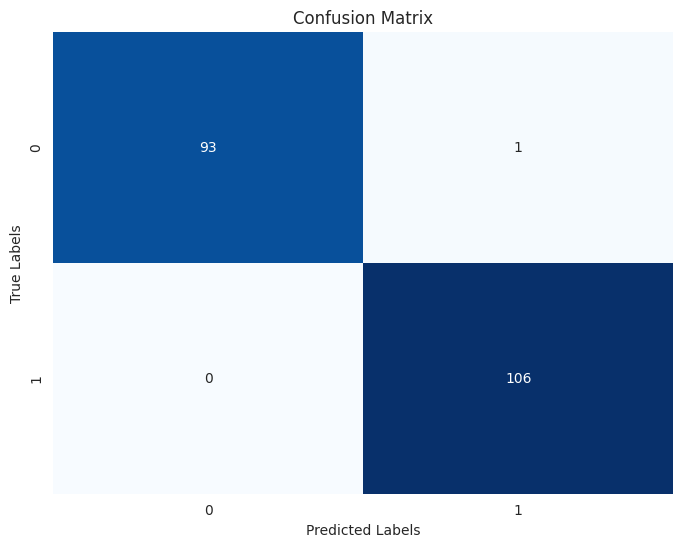

In [ ]:
#heat map of confusion metrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# model saved in pkl
from joblib import dump
dump(rf_model, 'rf_liquidity_model.pkl')


['rf_liquidity_model.pkl']

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.99375 1.      0.99375 1.      1.     ]
Mean CV Score: 0.9974999999999999


In [ ]:
# check overfitting throw train score and test score
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)
if train_score > test_score:
    print("Overfitting")
elif train_score < test_score:
    print("Underfitting")
else:
    print("Good Fit")


Train Score: 1.0
Test Score: 0.995
Overfitting


In [ ]:
importances = rf_model.feature_importances_
features = X.columns
sorted(zip(importances, features), reverse=True)


[(np.float64(0.6141038928156273), 'log_liquidity'),
 (np.float64(0.25003756883768086), 'log_volume'),
 (np.float64(0.07292206329534631), 'vol_per_price'),
 (np.float64(0.03364279578209732), 'log_mkt_cap'),
 (np.float64(0.015540453290924837), 'log_price'),
 (np.float64(0.007255022060435299), 'momentum_3d'),
 (np.float64(0.006498203917888223), 'volatility_24h')]

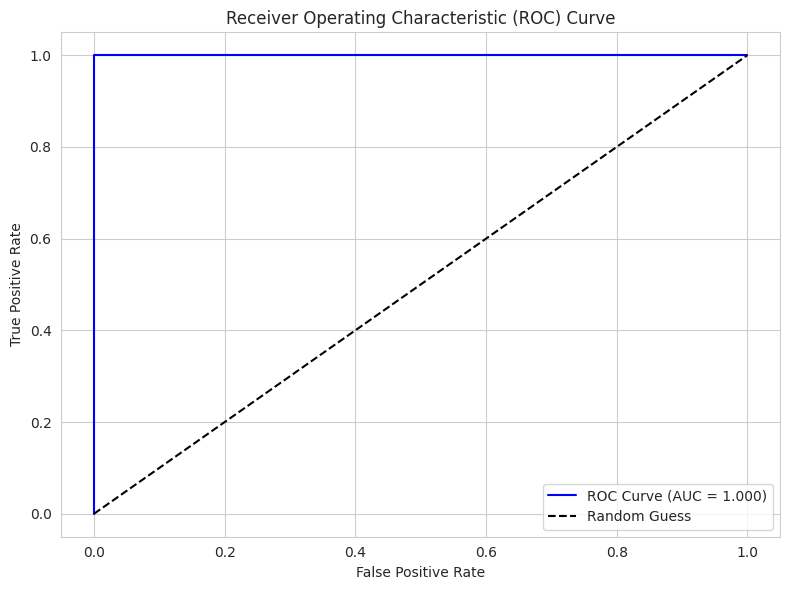

np.float64(1.0)

In [ ]:
# roc - auc curve
from sklearn.metrics import roc_curve,roc_auc_score


# predict probabilities
y_proba = rf_model.predict_proba(X_test)[:, 1]

# compute rocc curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# plot roc curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.3f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

auc_score


## Step 7: Deployment (in local system (i am using render))

In [ ]:
!pip install streamlit

In [ ]:
%%writefile streamlit_app.py
import streamlit as st
import joblib
import numpy as np

# Load model
model = joblib.load("rf_liquidity_model.pkl")

st.title("Crypto Liquidity Classifier")

st.write("Enter values to predict liquidity class:")

# Input fields for features
log_volume = st.number_input("Log Volume")
log_liquidity = st.number_input("Log Liquidity")
log_mkt_cap = st.number_input("Log Market Cap")
momentum_3d = st.number_input("Momentum (1h + 24h + 7d)")
volume_per_price = st.number_input("Volume per Price")
volatility_24h = st.number_input("24h Volatility")
log_price = st.number_input("Log Price")


# Predict
if st.button("Predict"):
    input_data = np.array([[log_volume, log_liquidity, log_mkt_cap,
                            momentum_3d, volume_per_price,
                            volatility_24h, log_price]])
    prediction = model.predict(input_data)[0]
    label = "High Liquidity" if prediction == 1 else "Low Liquidity"
    st.success(f"Prediction: {label}")


Overwriting streamlit_app.py


In [ ]:
%%writefile requirements.txt
streamlit
scikit-learn
joblib
numpy

Writing requirements.txt


In [ ]:
from google.colab import files
files.download('rf_liquidity_model.pkl')
files.download('streamlit_app.py')
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final_df.head()

,log_volume,log_liquidity,log_mkt_cap,momentum_3d,vol_per_price,volatility_24h,log_price,liquidity_class
0,24.289717,0.044881,27.370943,0.107,8.661584e+05,0.030,10.617918,1
1,23.706353,0.058622,26.513545,0.123,7.195971e+06,0.034,7.917686,1
2,24.782587,0.544939,25.104857,-0.002,5.793491e+10,0.001,0.693147,1
3,21.056772,0.021561,24.882833,0.050,3.640440e+06,0.028,5.951762,0
4,22.077108,0.071530,24.678772,-0.001,3.872758e+09,0.000,0.693084,1
